# Shapley Values Analysis

In [2]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("../processed_data/2018_Clusters_Ratios_AF_All.csv")
df = df.set_index('Name')

In [4]:
df

,Net cash flow / Change in cash,Average Payables,Average Receivables,currentRatio,SG&A to Revenue,daysOfPayablesOutstanding,daysOfInventoryOutstanding,eBITperRevenue,Debt to Assets,Debt to Equity,Payout Ratio,ROE,R&D to Revenue,PE ratio,Dividend Yield,cluster
Name,,,,,,,,,,,,,,,,
Comcast Corporation,0.118923,0.473944,1.638677,-0.356853,-0.044034,-0.066821,-0.026435,0.050575,0.337676,0.055796,0.010642,-0.015926,-0.049350,-0.108544,0.033407,0
"Kinder Morgan, Inc.",0.942280,0.012576,0.094058,-0.363241,-0.060170,-0.066377,-0.027191,0.051445,0.396621,0.022762,0.152212,-0.015927,-0.049350,-0.016143,0.213109,1
Intel Corporation,-0.113235,0.160323,0.946998,-0.185465,-0.058846,-0.070255,-0.027910,0.051786,-0.141131,-0.032390,-0.007532,-0.015925,-0.046837,-0.136551,0.021842,2
"Micron Technology, Inc.",0.437831,0.206949,0.665927,0.007278,-0.060563,-0.061652,-0.022345,0.053225,-0.340499,-0.047726,-0.057847,-0.015925,-0.048425,-0.191694,-0.205898,2
General Electric Company,-2.818243,0.982517,6.219718,-0.187800,-0.057501,-0.064205,-0.018289,0.047457,0.114367,0.186120,-0.084821,-0.015931,-0.049350,-0.231417,0.246024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Willamette Valley Vineyards, Inc.",0.013329,-0.084326,-0.173367,0.467234,-0.049720,-0.067693,-0.027449,0.050511,-0.282157,-0.045388,-0.057847,-0.015927,-0.049350,-0.059390,-0.205898,4
"Xcel Brands, Inc.",0.014151,-0.084251,-0.171965,-0.231096,-0.043934,-0.061556,-0.013858,0.049769,-0.270288,-0.043898,-0.057847,-0.015927,-0.049350,-0.057434,-0.205898,2
"Yield10 Bioscience, Inc.",0.011041,-0.084476,-0.173716,0.207870,0.167490,-0.055292,-0.015336,-0.104876,0.447922,0.024684,-0.057847,-0.015936,0.063150,-0.231417,-0.205898,1


In [5]:
np.random.seed(0)

# The target variable is 'cluster'.
Y = df['cluster']
X = df.drop(['cluster'], axis=1)
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [6]:
Y

Name
Comcast Corporation                  0
Kinder Morgan, Inc.                  1
Intel Corporation                    2
Micron Technology, Inc.              2
General Electric Company             0
                                    ..
Willamette Valley Vineyards, Inc.    4
Xcel Brands, Inc.                    2
Yield10 Bioscience, Inc.             1
ZK International Group Co., Ltd.     2
Zymeworks Inc.                       4
Name: cluster, Length: 3497, dtype: int64

In [7]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, Y_train);

from sklearn.metrics import confusion_matrix

test_pred = rf.predict(X_test)
confusion_matrix(test_pred, Y_test)

array([[ 11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 176,   2,   1,   2,   0,   0,   0,   0,   0,   2,   0],
       [  0,   1, 320,   0,   1,   3,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   4,   0,  86,   1,   0,   1,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,  31,   0,   2,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0,   0,  16,   0,   2,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

#### Shap Summary Plot (Stacked)

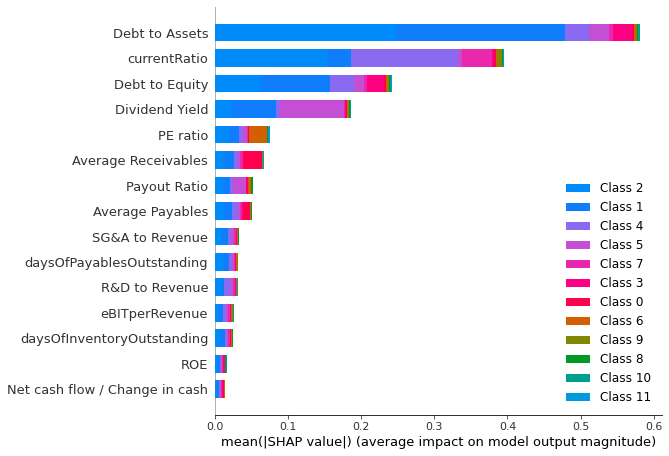

In [9]:
shap_values = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

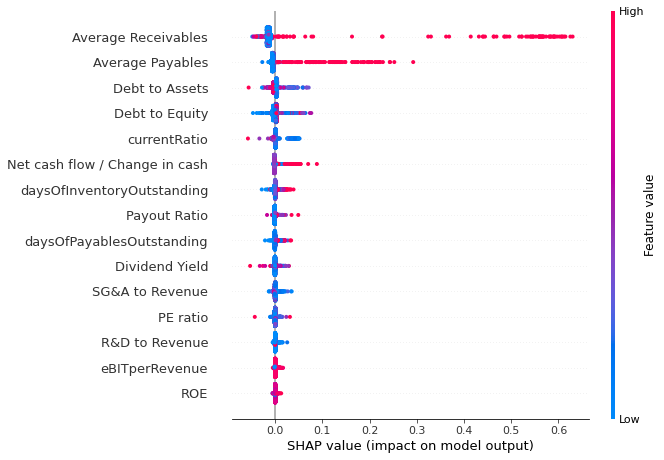

In [49]:
shap.summary_plot(shap_values[0], X_train)

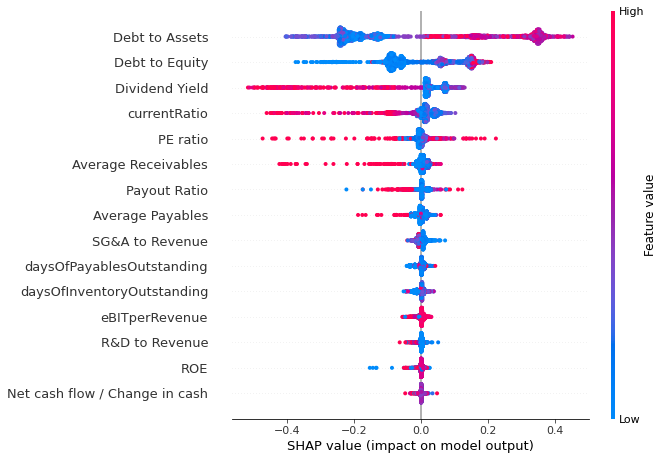

In [11]:
shap.summary_plot(shap_values[1], X_train)

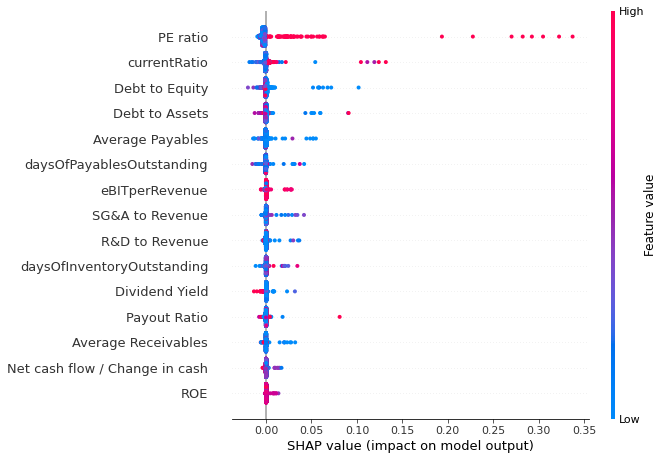

In [63]:
# Saves all the shapley value summary plots
for val in range(len(shap_values)):
    plt.clf()
    fig = shap.summary_plot(shap_values[val], X_train, show=False);
    plt.savefig('../processed_data/shap_plots/shapcluster' + str(val) + '.png', bbox_inches='tight')

In [60]:
# incomplete & wrong - but was attempting to get insight on whether the attr was high or low (ex. cluster 0 has high average receivables)
sums = [0] * len(shap_values[0][0]);
lengths = [0] * len(shap_values[0][0]);
for value in range(len(shap_values[0])):
    for attr in range(len(shap_values[0][value])):
        if (shap_values[0][value][attr] > 0):
            lengths[attr]+= 1;
            sums[attr] += X_train.iloc[:, attr][value];
average = [0] * len(shap_values[0][0]);
for s in range(len(sums)):
    average[s] = sums[s] / lengths[s];

### Output csv file with importances

In [43]:
topattrs = [];
for cluster in shap_values:
    topattr = X_train.columns[np.argsort(np.abs(cluster).mean(0))][-3:].tolist()
    topattr.reverse()
    topattrs.append(topattr)


In [44]:
topattrs

['PE ratio', 'currentRatio', 'Debt to Equity']

In [82]:
import json
with open('../processed_data/2018_Clusters_All_Factors.json', 'w') as outfile:
    json.dump(topattrs, outfile)